In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
data=pd.read_csv('loan_data (1).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [7]:
data.isnull().sum().sort_values(ascending=False)

Credit_History       30
Self_Employed        21
Loan_Amount_Term     11
Dependents            8
Gender                5
Loan_ID               0
Married               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
data.shape

(381, 13)

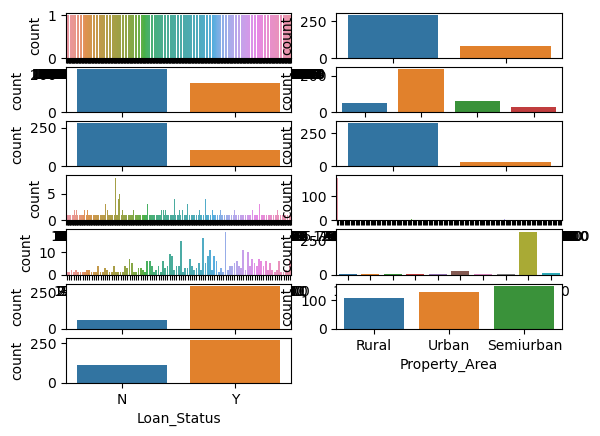

In [8]:
t=1
for i in data.columns:
    plt.subplot(7, 2, t)
    sns.countplot(x=data[i])
    t=t+1
    


In [9]:
# Credit History
data['Credit_History'].value_counts()

Credit_History
1.0    294
0.0     57
Name: count, dtype: int64

In [10]:
data['Credit_History'].fillna(1, inplace=True)

In [13]:
# Self Employed
data['Self_Employed'].value_counts()

Self_Employed
No     346
Yes     35
Name: count, dtype: int64

In [12]:
data['Self_Employed'].fillna('No', inplace=True)

In [14]:
# Loan Amount Term
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: count, dtype: int64

In [15]:
data['Loan_Amount_Term'].fillna(360.0, inplace=True)

In [16]:
data.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    323
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: count, dtype: int64

In [17]:
# Dependents
data['Dependents'].value_counts()

Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64

In [18]:
data['Dependents'].fillna(0, inplace=True)

In [19]:
data.Dependents.value_counts()

Dependents
0     234
2      59
1      52
3+     28
0       8
Name: count, dtype: int64

In [21]:
data['Dependents'].replace({0:'0'}, inplace=True)

In [22]:
data.Dependents.value_counts()

Dependents
0     242
2      59
1      52
3+     28
Name: count, dtype: int64

In [23]:
#Gender
data.Gender.value_counts()

Gender
Male      291
Female     85
Name: count, dtype: int64

In [24]:
data['Gender'].fillna('Male', inplace=True)

In [25]:
data.Gender.value_counts()

Gender
Male      296
Female     85
Name: count, dtype: int64

# Encoding

In [ ]:
#Drop Loan ID
data.drop(columns='Loan_ID', inplace=True)

In [29]:
# Dependent
data['Dependents'].replace('3+', '3', inplace=True)

In [32]:
data['Dependents']=data['Dependents'].astype(int)

In [34]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [35]:
#Rest of the columns
dummy=pd.get_dummies(data, drop_first=True, dtype=int)
dummy.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
2,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
3,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
4,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,1,1


## Decision Tree

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, roc_curve, roc_auc_score

In [37]:
def model_validation(model, x, y):
    global m
    m=model
    m.fit(x, y)
    pred=m.predict(x)
    prob=m.predict_proba(x)[:,1]
    
    print('Confusion Matrix\n', confusion_matrix(y,pred))
    print('Classification Matrix\n', classification_report(y,pred))
    print('Cohen Kappa', cohen_kappa_score(y, pred))
    
    fpr, tpr, thresh = roc_curve(y, prob)
    plt.plot(fpr, tpr, color='hotpink')
    plt.plot([0,1],[0,1], color='red', ls='--')
    plt.title(f'AUC{roc_auc_score(y,prob)}')
    

In [38]:
y=dummy['Loan_Status_Y']
x=dummy.drop(columns='Loan_Status_Y')

Confusion Matrix
 [[ 67  43]
 [  3 268]]
Classification Matrix
               precision    recall  f1-score   support

           0       0.96      0.61      0.74       110
           1       0.86      0.99      0.92       271

    accuracy                           0.88       381
   macro avg       0.91      0.80      0.83       381
weighted avg       0.89      0.88      0.87       381

Cohen Kappa 0.6704400150432493


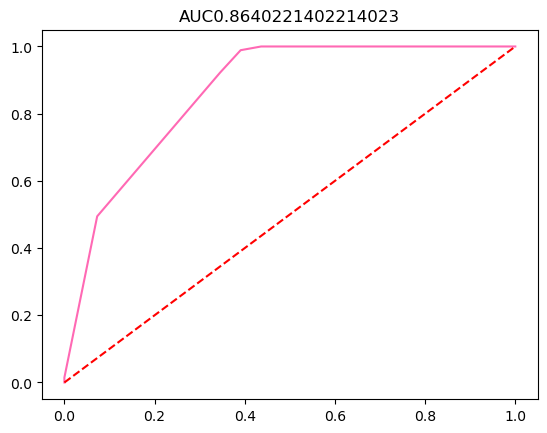

In [40]:
model_validation(DecisionTreeClassifier(max_depth=5), x, y)

## Ensemble Learning

In [41]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB

Confusion Matrix
 [[ 99  11]
 [  4 267]]
Classification Matrix
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       110
           1       0.96      0.99      0.97       271

    accuracy                           0.96       381
   macro avg       0.96      0.94      0.95       381
weighted avg       0.96      0.96      0.96       381

Cohen Kappa 0.9022960012309165


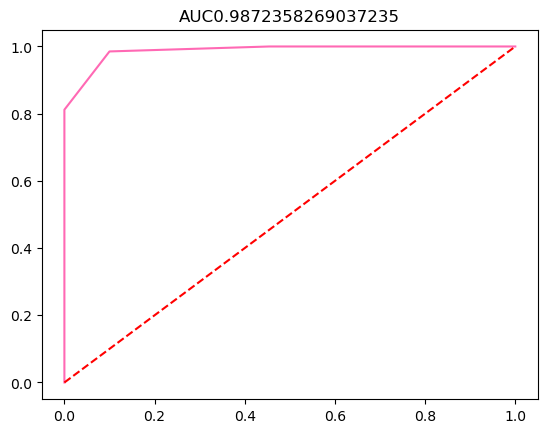

In [42]:
model_validation(RandomForestClassifier(n_estimators=3), x, y)

Confusion Matrix
 [[105   5]
 [ 31 240]]
Classification Matrix
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       110
           1       0.98      0.89      0.93       271

    accuracy                           0.91       381
   macro avg       0.88      0.92      0.89       381
weighted avg       0.92      0.91      0.91       381

Cohen Kappa 0.7850358900416889


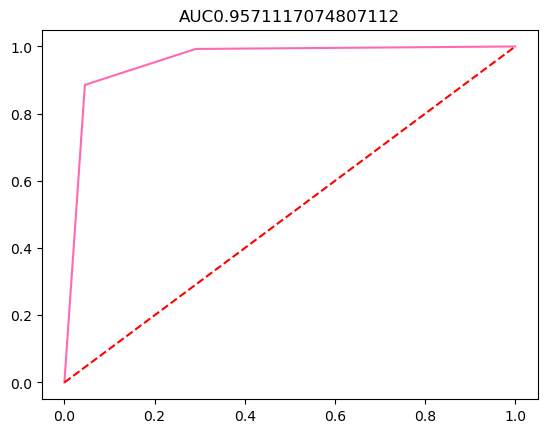

In [43]:
model_validation(RandomForestClassifier(n_estimators=2), x, y)

Confusion Matrix
 [[102   8]
 [  3 268]]
Classification Matrix
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       110
           1       0.97      0.99      0.98       271

    accuracy                           0.97       381
   macro avg       0.97      0.96      0.96       381
weighted avg       0.97      0.97      0.97       381

Cohen Kappa 0.9287426676868146


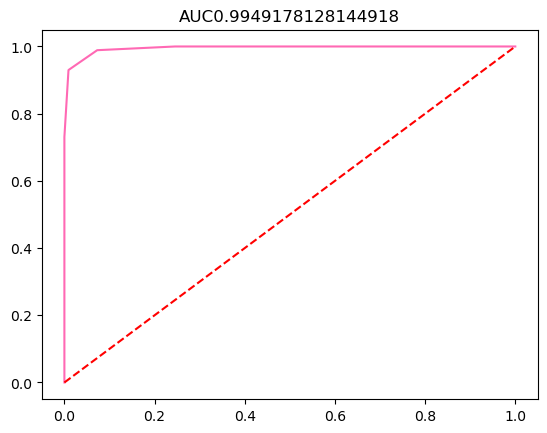

In [44]:
model_validation(RandomForestClassifier(n_estimators=5), x, y)

Confusion Matrix
 [[ 57  53]
 [  4 267]]
Classification Matrix
               precision    recall  f1-score   support

           0       0.93      0.52      0.67       110
           1       0.83      0.99      0.90       271

    accuracy                           0.85       381
   macro avg       0.88      0.75      0.79       381
weighted avg       0.86      0.85      0.84       381

Cohen Kappa 0.5801936943032224


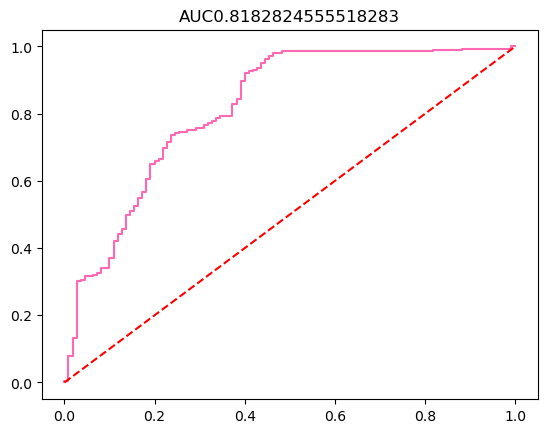

In [47]:
# Bagging (Naive Bayes)
model_validation(BaggingClassifier(estimator=GaussianNB(), n_estimators=3, max_samples=x.shape[0]),x,y)

Confusion Matrix
 [[ 55  55]
 [  4 267]]
Classification Matrix
               precision    recall  f1-score   support

           0       0.93      0.50      0.65       110
           1       0.83      0.99      0.90       271

    accuracy                           0.85       381
   macro avg       0.88      0.74      0.78       381
weighted avg       0.86      0.85      0.83       381

Cohen Kappa 0.5627419323464762


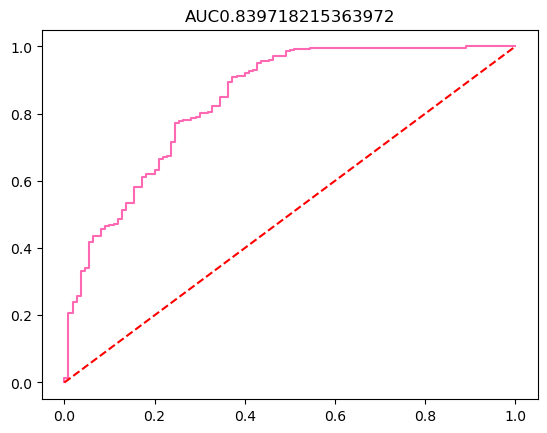

In [48]:
model_validation(BaggingClassifier(estimator=GaussianNB(), n_estimators=50, max_samples=x.shape[0]),x,y)

In [49]:
m.estimators_features_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 0,  1

In [50]:
m.estimators_samples_

[array([104, 155, 163, 335, 217,  46, 119, 133, 228, 166, 269, 337, 246,
         74, 309,   7, 330, 345, 344,   6, 365, 160, 153, 328, 355, 302,
         65,  60,  14, 238, 336, 285, 298, 332,  55, 282, 326,  45, 201,
        358, 132, 361, 292, 348, 223, 155, 129, 248, 345, 364, 133, 362,
        116, 134, 312,  42, 191, 173, 278,  41, 277, 378,  77, 216,  67,
         49,  76,  68,   7,  18,   1,  32, 172, 160, 297, 218,   9, 122,
        279,  94,  40,  84, 278,  72, 308,  86, 313,  96,  45, 174, 355,
         35, 136, 183, 352, 205, 281,  90, 337,  59,  90, 199,  54, 162,
        298, 275,   6, 270,  51,  60,  66, 266, 328, 141,  18, 349,  62,
        373, 353,  59, 102, 324,  43, 234, 191, 192, 117, 380, 228,  36,
        146, 106, 125,  20, 317,  84, 183, 182,  44, 257, 109,  96, 347,
         60, 276, 353,  41, 212, 185, 119,  17,  98,  18, 293, 359, 227,
        367, 282, 186, 378, 122, 197, 112, 280, 200, 148, 179, 336, 105,
        230, 270,  33, 373,  91,  56, 143,  33,  60

Confusion Matrix
 [[ 55  55]
 [  4 267]]
Classification Matrix
               precision    recall  f1-score   support

           0       0.93      0.50      0.65       110
           1       0.83      0.99      0.90       271

    accuracy                           0.85       381
   macro avg       0.88      0.74      0.78       381
weighted avg       0.86      0.85      0.83       381

Cohen Kappa 0.5627419323464762


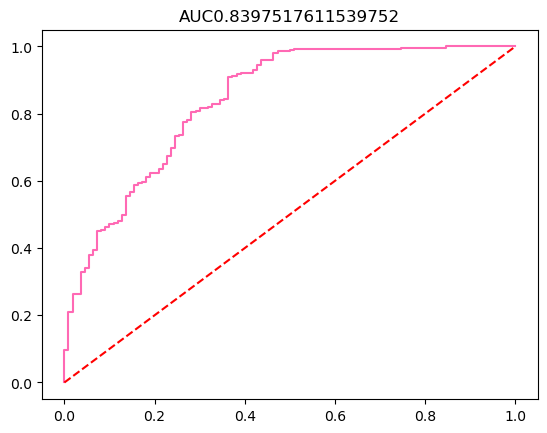

In [51]:
model_validation(BaggingClassifier(estimator=GaussianNB(), n_estimators=100, max_samples=x.shape[0]),x,y)